## Assignment 2

## Data Wrangling Using Pandas


## PGCP DSML IITR-TimesPro


### Submitted by - Sylvia Chadha

### Problem Statement 

In this assignment we are going to analyze a web log file. Read this article for description about a typical web log file: https://en.wikipedia.org/wiki/Common_Log_Format). We need to clean/parse the log file to convert them into a proper tabular format 

In the first part of this assignment, you need to understand the structure of each log and use regular expression to parse the data.

In the second part of the assignment, you will be asked to clean the columns further and perform many useful analysis. 

### Dataset

Filename: 'access_log_Jul95.txt' 

### Question1

Write a regular expression to convert the data in a structured o/p (sample o/p shown below) 
- Use this regular expression to read the data using pandas read_csv function. 
- If required that you ignore blank columns Manually label the columns as shown in the sample output below 


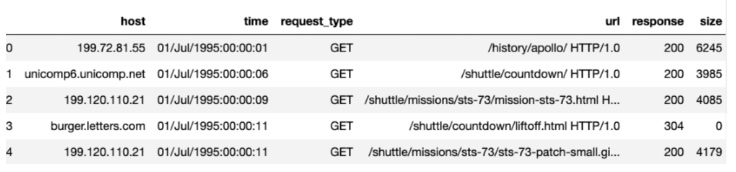

### Solution1


In [1]:
import pandas as pd

sep = '([^\s]+).*\[([^\s]+).*\"([^\s]+)\s([^\s]+.*)\"\s(\d+)\s(\d+)'
fileName = '/Users/sylvia/Desktop/datasets/access_logs.txt'

df = pd.read_csv(
    fileName,
    sep=sep,
    index_col=0,
    header=None,
    engine='python')
    
df = df.dropna(how='all', axis=1)


In [2]:
# Label the columns

df.reset_index(drop=True, inplace=True)
df.columns = ['host', 'time', 'request_type', 'url','response','size']
df.head()

,host,time,request_type,url,response,size
0,199.72.81.55,01/Jul/1995:00:00:01,GET,/history/apollo/ HTTP/1.0,200.0,6245.0
1,unicomp6.unicomp.net,01/Jul/1995:00:00:06,GET,/shuttle/countdown/ HTTP/1.0,200.0,3985.0
2,199.120.110.21,01/Jul/1995:00:00:09,GET,/shuttle/missions/sts-73/mission-sts-73.html H...,200.0,4085.0
3,burger.letters.com,01/Jul/1995:00:00:11,GET,/shuttle/countdown/liftoff.html HTTP/1.0,304.0,0.0
4,199.120.110.21,01/Jul/1995:00:00:11,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...,200.0,4179.0


In [3]:
df.shape

(91714, 6)

### Question2

Identify number of requests for each hour and plot the same using line plot. Use the following instructions
- Convert the data type of time column to datetime using pd.to_datetime() with appropriate time  format 
- Use resample function to identify number of requests per hour and plot the same using line plot 
- Interpret the chart and identify from which hour of the day, the number of page visits increases 

### Solution2


In [4]:
df.tail(10)

,host,time,request_type,url,response,size
91704,ix-tam3-07.ix.netcom.com,02/Jul/1995:13:39:56,GET,/shuttle/missions/ HTTP/1.0,200.0,12283.0
91705,lullaby.demon.co.uk,02/Jul/1995:13:39:59,GET,/history/apollo/apollo-11/apollo-11.html HTTP/1.0,200.0,41397.0
91706,che2.llnl.gov,02/Jul/1995:13:40:02,GET,/shuttle/missions/sts-7/ HTTP/1.0,200.0,1585.0
91707,131.89.78.20,02/Jul/1995:13:40:03,GET,/history/apollo/apollo.html HTTP/1.0,200.0,3258.0
91708,net20.intserv.com,02/Jul/1995:13:40:03,GET,/shuttle/missions/sts-71/images/images.html HT...,200.0,7634.0
91709,ix-tam3-07.ix.netcom.com,02/Jul/1995:13:40:05,GET,/icons/blank.xbm HTTP/1.0,200.0,509.0
91710,csd1-9.infolink.net,02/Jul/1995:13:40:06,GET,/procurement/business/kscbus.htm HTTP/1.0,200.0,1293.0
91711,port49.iprolink.ch,02/Jul/1995:13:40:07,GET,/shuttle/missions/sts-71/sts-71-day-06-highlig...,200.0,6136.0
91712,che2.llnl.gov,02/Jul/1995:13:40:07,GET,/shuttle/missions/sts-7/images/ HTTP/1.0,200.0,1313.0
91713,ix-tam3-07.ix.netcom.com,02/Jul/1995:13:40:07,GET,/icons/menu.xbm HTTP/1.0,200.0,527.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91714 entries, 0 to 91713
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   host          90788 non-null  object 
 1   time          90788 non-null  object 
 2   request_type  90788 non-null  object 
 3   url           90788 non-null  object 
 4   response      90788 non-null  float64
 5   size          90788 non-null  float64
dtypes: float64(2), object(4)
memory usage: 4.2+ MB


In [6]:
data_miss = df.isna().sum()
data_miss

host            926
time            926
request_type    926
url             926
response        926
size            926
dtype: int64

In [7]:
#Remove rows and columns where all values are missing values.

df1 = df.dropna(how='all').dropna(how='all', axis=1)
df1.shape

(90788, 6)

In [8]:
#% of null entries which were deleted
data_miss[0]/df.shape[0]*100

# Only 1% of entries missing we can drop them.

1.0096604662319821

**Convert the data type of time column to datetime using pd.to_datetime() with appropriate time format**

In [9]:
# 02/Jul/1995:13:40:07


df1['time'] = pd.to_datetime(df1['time'], format="%d/%b/%Y:%H:%M:%S")
df1['time'].head()

0   1995-07-01 00:00:01
1   1995-07-01 00:00:06
2   1995-07-01 00:00:09
3   1995-07-01 00:00:11
4   1995-07-01 00:00:11
Name: time, dtype: datetime64[ns]

In [10]:
df1['time'].min(), df1['time'].max()

(Timestamp('1995-07-01 00:00:01'), Timestamp('1995-07-02 13:40:07'))

**Use resample function to identify number of requests per hour and plot the same using line plot**

- Current granularity of data is on seconds 
- Need to resample per hour 

In [11]:
df1.head()

,host,time,request_type,url,response,size
0,199.72.81.55,1995-07-01 00:00:01,GET,/history/apollo/ HTTP/1.0,200.0,6245.0
1,unicomp6.unicomp.net,1995-07-01 00:00:06,GET,/shuttle/countdown/ HTTP/1.0,200.0,3985.0
2,199.120.110.21,1995-07-01 00:00:09,GET,/shuttle/missions/sts-73/mission-sts-73.html H...,200.0,4085.0
3,burger.letters.com,1995-07-01 00:00:11,GET,/shuttle/countdown/liftoff.html HTTP/1.0,304.0,0.0
4,199.120.110.21,1995-07-01 00:00:11,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...,200.0,4179.0


In [12]:
# Change df1['time'] as index of dataframe as resample resample function uses DatetimeIndex, PeriodIndex, or TimedeltaIndex

df2 = df1.set_index(pd.DatetimeIndex(df1['time'])).drop('time',axis=1)
df2.head()

,host,request_type,url,response,size
time,,,,,
1995-07-01 00:00:01,199.72.81.55,GET,/history/apollo/ HTTP/1.0,200.0,6245.0
1995-07-01 00:00:06,unicomp6.unicomp.net,GET,/shuttle/countdown/ HTTP/1.0,200.0,3985.0
1995-07-01 00:00:09,199.120.110.21,GET,/shuttle/missions/sts-73/mission-sts-73.html H...,200.0,4085.0
1995-07-01 00:00:11,burger.letters.com,GET,/shuttle/countdown/liftoff.html HTTP/1.0,304.0,0.0
1995-07-01 00:00:11,199.120.110.21,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...,200.0,4179.0


time
1995-07-01 00:00:00    3519
1995-07-01 01:00:00    2978
1995-07-01 02:00:00    2246
1995-07-01 03:00:00    1713
1995-07-01 04:00:00    1468
Freq: H, Name: request_type, dtype: int64


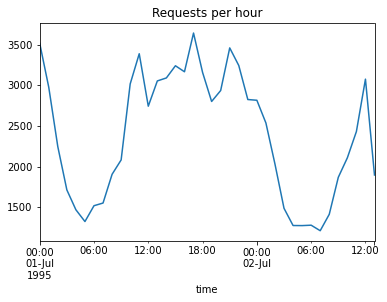

In [31]:
df3 = df2.resample('H').count()['request_type']
print(df3.head())
df3.plot(title = 'Requests per hour');

**Interpret the chart and identify from which hour of the day, the number of page visits increases**

- From 06:00 hrs in morning the number of page visits increase.
- Usually high volume b/w 12 noon and 00:00 midnight.
- Starts to decrease b/w 00:00 hrs to 6:00.

### Question3

Identify different types of `request_type` along with their frequencies 

### Solution3


In [14]:
req = df1['request_type'].value_counts()
req

GET     90713
HEAD       74
POST        1
Name: request_type, dtype: int64

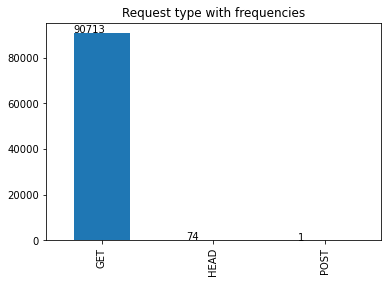

In [15]:
ax = req.plot(kind='bar', title = 'Request type with frequencies');
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    

**Analysis**

We observe that maximum of request type is "GET".

### Question4

Analyze `size` column using the following instruction 

- Convert `size` column to numeric (Remove special characters, if necessary) 
- Using pd.cut, divide `size` column in to 10 bins. 
- Identify the bin which has the maximum count 

### Solution4


**Convert size column to numeric (Remove special characters, if necessary)**

In [16]:
df1['size'].dtype

dtype('float64')

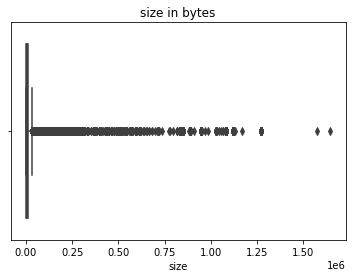

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df1['size'])
plt.title('size in bytes')
plt.show();

In [18]:
q1 = df1['size'].quantile(0.25)
q3 = df1['size'].quantile(0.75)
iqr = q3 - q1

print('About 75% of total data is within', q3,'bytes')


About 75% of total data is within 13372.0 bytes


**Using pd.cut, divide size column in to 10 bins**

In [19]:
size_bins = pd.cut(x=df1['size'], bins=10)
print(size_bins.cat.categories)

IntervalIndex([(-1646.592, 164659.2], (164659.2, 329318.4], (329318.4, 493977.6], (493977.6, 658636.8], (658636.8, 823296.0], (823296.0, 987955.2], (987955.2, 1152614.4], (1152614.4, 1317273.6], (1317273.6, 1481932.8], (1481932.8, 1646592.0]], dtype='interval[float64, right]')


In [20]:
(df1['size'] < 0).any().any()


False

Since there is no negative value in size column so we replace the first negative index to 0.

In [21]:
first_I = size_bins.cat.categories[0]
new_I = pd.Interval(0, first_I.right)
size_bins = size_bins.cat.rename_categories({first_I: new_I})
print(size_bins.cat.categories)

IntervalIndex([(0.0, 164659.2], (164659.2, 329318.4], (329318.4, 493977.6], (493977.6, 658636.8], (658636.8, 823296.0], (823296.0, 987955.2], (987955.2, 1152614.4], (1152614.4, 1317273.6], (1317273.6, 1481932.8], (1481932.8, 1646592.0]], dtype='interval[float64, right]')


In [22]:
size_bins.value_counts().sort_index()

(0.0, 164659.2]           88554
(164659.2, 329318.4]       1283
(329318.4, 493977.6]        147
(493977.6, 658636.8]        205
(658636.8, 823296.0]         17
(823296.0, 987955.2]        373
(987955.2, 1152614.4]       173
(1152614.4, 1317273.6]       34
(1317273.6, 1481932.8]        0
(1481932.8, 1646592.0]        2
Name: size, dtype: int64

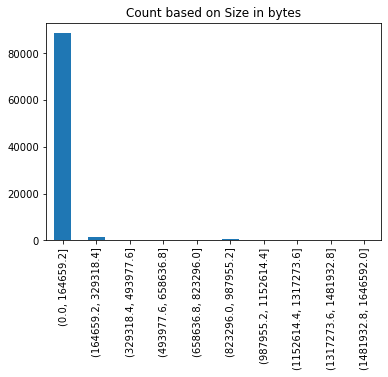

In [23]:
size_bins.value_counts().sort_index().plot(kind='bar', title='Count based on Size in bytes');

**Identify the bin which has the maximum count**
- Range of total data is from 0 to 1646KB
- However Bin (0.0, 164659.2] has maximum count so most of page size is upto 164 KB only.
- Since upto 164 KB has most of the data, we further divide to see more granular details.

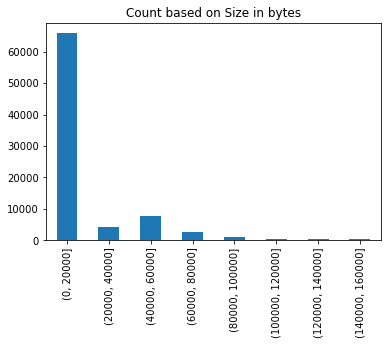

In [24]:
size_bins1 = pd.cut(x=df1['size'], bins=[0,20000,40000,60000,80000,100000,120000,140000,160000])
size_bins1.value_counts().sort_index().plot(kind='bar', title='Count based on Size in bytes');

We observe that maximum count is for page size upto 20KB only.

### Question5

Using `url` column, create a new column `file_type` based on following conditions 

- If the `url` ends with either `.gif` or `.jpg`, `file_type` will be `image` 
- If the `url` ends with `.html`, `file_type` will be `html` 
- Else `file_type` will be `Other` 
- Identify how many times images were rendered 

### Solution5

In [25]:
import re
text = '/shuttle/countdown/video/livevideo.gif HTTP/1.0'

rzlt = re.findall('^.*\.(.*)\s.*', text)
rzlt
print(type(rzlt))

rzlt = ''.join(rzlt)
print(type(rzlt))


<class 'list'>
<class 'str'>


In [26]:
df1['regex']=df1['url'].apply(lambda record: re.findall('^.*\.(.*)\s.*', record))
df1['regex']=df1['regex'].apply(lambda regex: ''.join(regex))
df1.head(10)

,host,time,request_type,url,response,size,regex
0,199.72.81.55,1995-07-01 00:00:01,GET,/history/apollo/ HTTP/1.0,200.0,6245.0,
1,unicomp6.unicomp.net,1995-07-01 00:00:06,GET,/shuttle/countdown/ HTTP/1.0,200.0,3985.0,
2,199.120.110.21,1995-07-01 00:00:09,GET,/shuttle/missions/sts-73/mission-sts-73.html H...,200.0,4085.0,html
3,burger.letters.com,1995-07-01 00:00:11,GET,/shuttle/countdown/liftoff.html HTTP/1.0,304.0,0.0,html
4,199.120.110.21,1995-07-01 00:00:11,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...,200.0,4179.0,gif
5,burger.letters.com,1995-07-01 00:00:12,GET,/images/NASA-logosmall.gif HTTP/1.0,304.0,0.0,gif
6,burger.letters.com,1995-07-01 00:00:12,GET,/shuttle/countdown/video/livevideo.gif HTTP/1.0,200.0,0.0,gif
7,205.212.115.106,1995-07-01 00:00:12,GET,/shuttle/countdown/countdown.html HTTP/1.0,200.0,3985.0,html
8,d104.aa.net,1995-07-01 00:00:13,GET,/shuttle/countdown/ HTTP/1.0,200.0,3985.0,
9,129.94.144.152,1995-07-01 00:00:13,GET,/ HTTP/1.0,200.0,7074.0,


In [27]:
df1['regex'].value_counts().sort_values(ascending=False)[0:15]

gif            46283
html           20117
               11686
jpg             3274
xbm             2802
mpg             2065
txt             1408
pl               955
GIF              880
jpeg             351
wav              305
htm              167
pl?IMAX           56
pl?SAREX-II       32
WAV               23
Name: regex, dtype: int64

**Analysis**

- gif and GIF are same
- jpg and jpeg are same
- .html and .htm are same

- Hence for all **gif, GIF, jpg, jpeg** filetype will be image.
- Also for both **.html and .htm**, filetype will be html.


In [28]:

df1['filetype']=df1['regex'].apply(lambda reg: "image" if reg=='gif' or reg=='GIF' or reg=='jpeg' or reg=='jpg' 
                                     else ("html" if reg=='html' or reg=='htm' else 'Other'))
    
df1.head(10)

,host,time,request_type,url,response,size,regex,filetype
0,199.72.81.55,1995-07-01 00:00:01,GET,/history/apollo/ HTTP/1.0,200.0,6245.0,,Other
1,unicomp6.unicomp.net,1995-07-01 00:00:06,GET,/shuttle/countdown/ HTTP/1.0,200.0,3985.0,,Other
2,199.120.110.21,1995-07-01 00:00:09,GET,/shuttle/missions/sts-73/mission-sts-73.html H...,200.0,4085.0,html,html
3,burger.letters.com,1995-07-01 00:00:11,GET,/shuttle/countdown/liftoff.html HTTP/1.0,304.0,0.0,html,html
4,199.120.110.21,1995-07-01 00:00:11,GET,/shuttle/missions/sts-73/sts-73-patch-small.gi...,200.0,4179.0,gif,image
5,burger.letters.com,1995-07-01 00:00:12,GET,/images/NASA-logosmall.gif HTTP/1.0,304.0,0.0,gif,image
6,burger.letters.com,1995-07-01 00:00:12,GET,/shuttle/countdown/video/livevideo.gif HTTP/1.0,200.0,0.0,gif,image
7,205.212.115.106,1995-07-01 00:00:12,GET,/shuttle/countdown/countdown.html HTTP/1.0,200.0,3985.0,html,html
8,d104.aa.net,1995-07-01 00:00:13,GET,/shuttle/countdown/ HTTP/1.0,200.0,3985.0,,Other
9,129.94.144.152,1995-07-01 00:00:13,GET,/ HTTP/1.0,200.0,7074.0,,Other


In [29]:
df1['filetype'].value_counts()

image    50788
html     20284
Other    19716
Name: filetype, dtype: int64

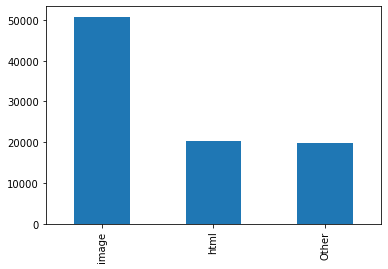

In [30]:
df1['filetype'].value_counts().plot(kind='bar');

**Analysis**

We see that Images were rendered maximum number of times which is 50788 times out of total requests.